# Week 9:Term Project Example

In this mini-project our will goal will be to look at Data published by US Census Bureau about the housing market in California. Given i set of features our goal is to find a model that predicts the median housing price in any district. The case has been taken from the book "Hands-On Machine Learning with Scikit-learn & TensorFlow" - Aurelien Geron.

Like all seasoned data scientists we start by loading our notebook with the standard toolbox of packages.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

### I - First we frame the problem:

The first task we need to establish is what is the objective of our Machine learning problem. How do we intend to use this data and model in the future. Knowing the objectives is crucial in all the decision we will be taking while building our model. Decisions that relate to anything from how to clean the data to how to evaluate the model.  

Let's assume we are investors and we are trying to undervalued districts. We will use the model to estimate the median bla bla


The first questions we need to answers are: What kind of problem are we looking at?

In this particular case it is obvious that we are dealing with a supervised learning problem that requieres a multivariate regression analysis. 

This said we can still reframe the problem differently at this stage by making the target a price range instead of a median price. In this case we will be dealing with a classification problem.



### II - Get the Data

In [0]:
data_table = pd.read_csv('housing.csv')

In [0]:
data_table.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The content and structure of our dataset looks fairly comprehansible. We can explore the data even more in depth by applying the the .info() method to it.

In [0]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Initial observations:

   - The __total_bedrooms__ feature has only 20433 non-values which means we need to deal with those missing vales.
   - All features are numerical and stored as type float64 except __ocean_proximity__. Pandas loaded as type 'Object' which be any Python Object but by compering with the the .head() output we know we are dealing with strings.

In [0]:
data_table['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Next, lets look at the summary of the other features:

In [0]:
data_table.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:

data_table.hist(bins=50, figsize=(20,15))

### To Notice:

- The median income feature does not seem to be expressed in US terms. After checking I realized that the data has been scaled and capped at 15 and the lower side is 0.5. 
- THe housing median age and median house value are also capped. The latter could be a problem since it is our target attribute. This is not ideal, and we need to see how we can fix it. We can't predict properly when the data is capped to 500,000, which means we will wrongly predict houses with value higher than 500k.
- The features in general vary a lot in scale.
- Many features exhibit distribuations that are far from being normal. In fact several have skews. 

### Visualising geographical Data

<IPython.core.display.Javascript object>


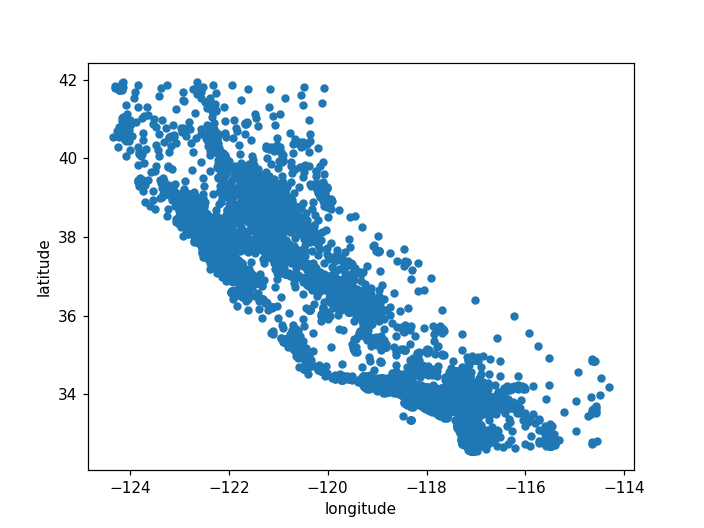

In [0]:
data_table.plot(kind="scatter", x="longitude", y="latitude")


<IPython.core.display.Javascript object>


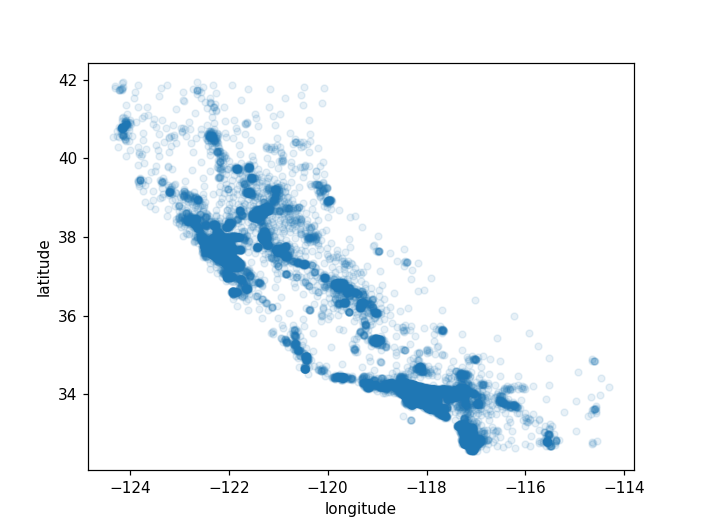

In [0]:
data_table.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

By adding the alpha argument we see a much more nuanced visualision of California, with two concertrated areas around Los Angelos and Central Valley.

Now lets add housing prices to the picture:

<IPython.core.display.Javascript object>


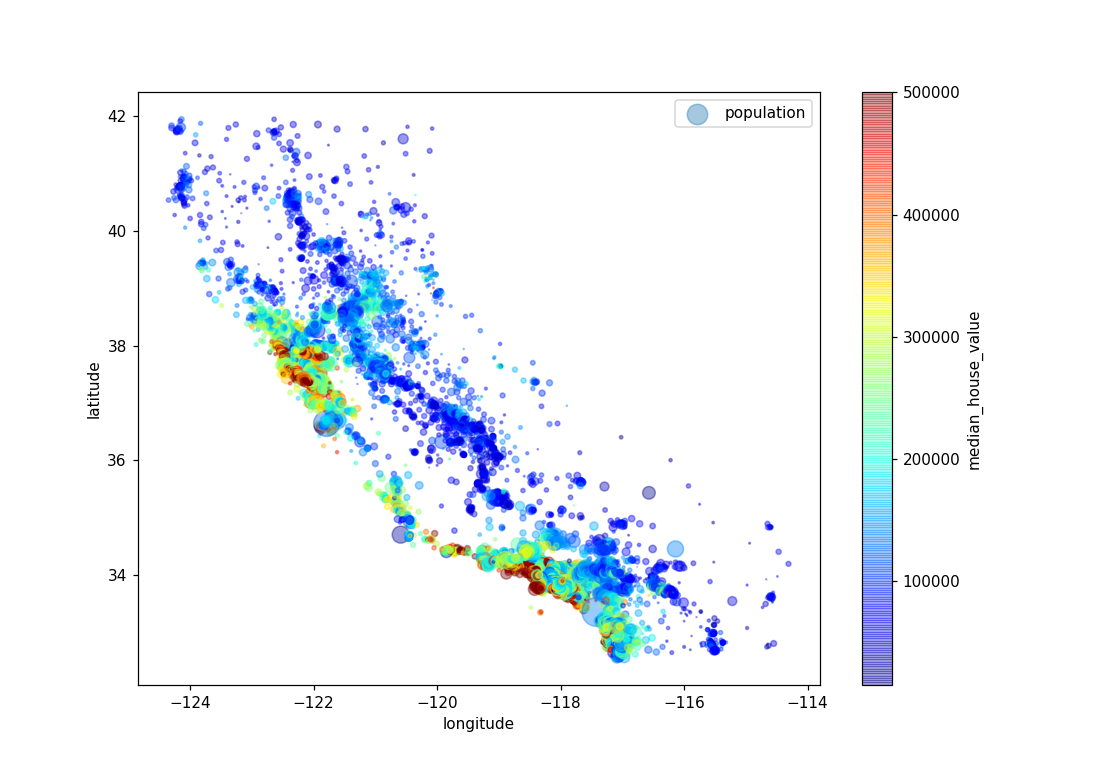

In [0]:
data_table.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data_table["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

### Exploring correlations:

In [0]:
corr_matrix = data_table.corr()

In [0]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [0]:
from pandas.plotting import scatter_matrix

<IPython.core.display.Javascript object>


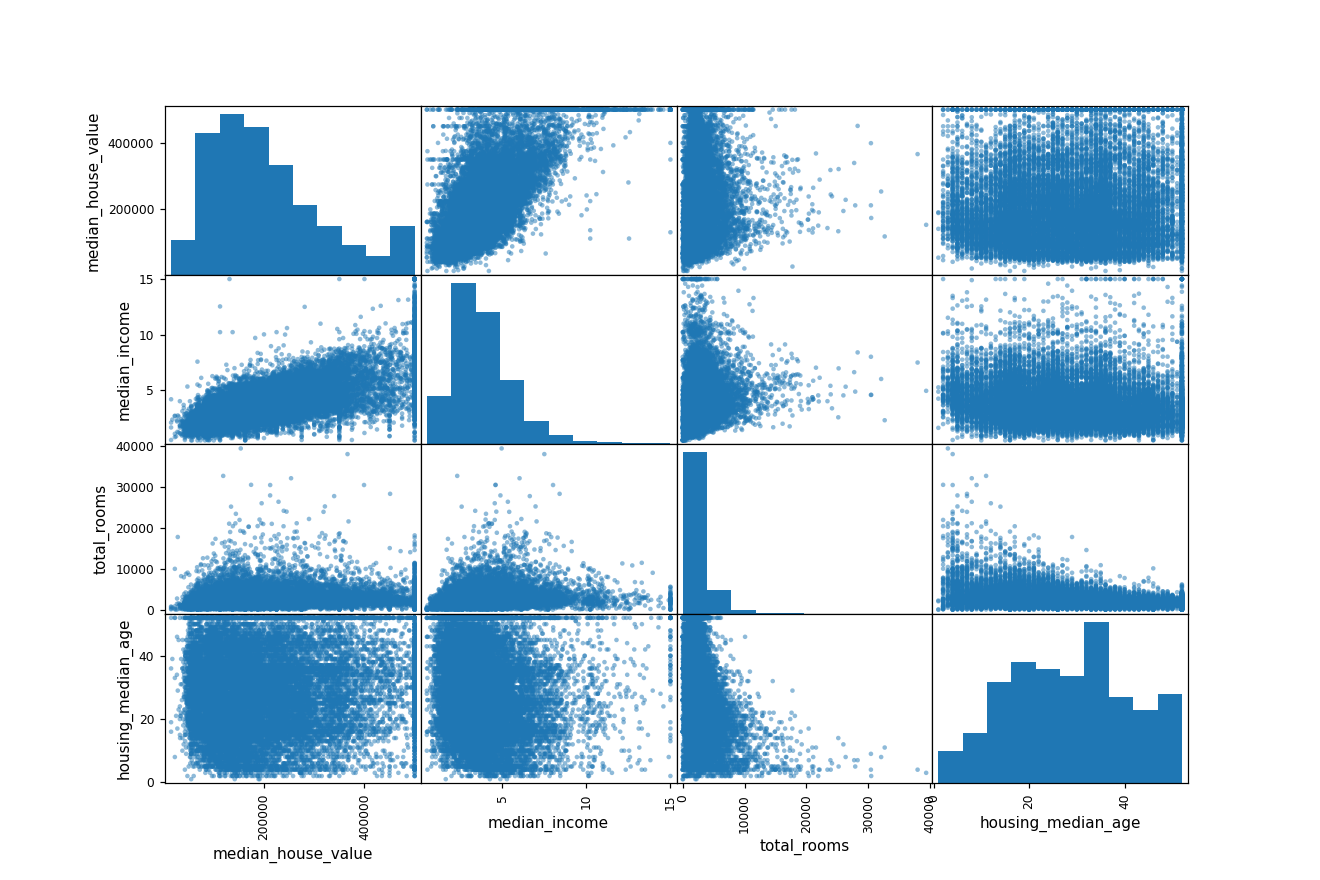

/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ramzisaou

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b044be0>,
      dtype=object)

In [0]:


attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(data_table[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


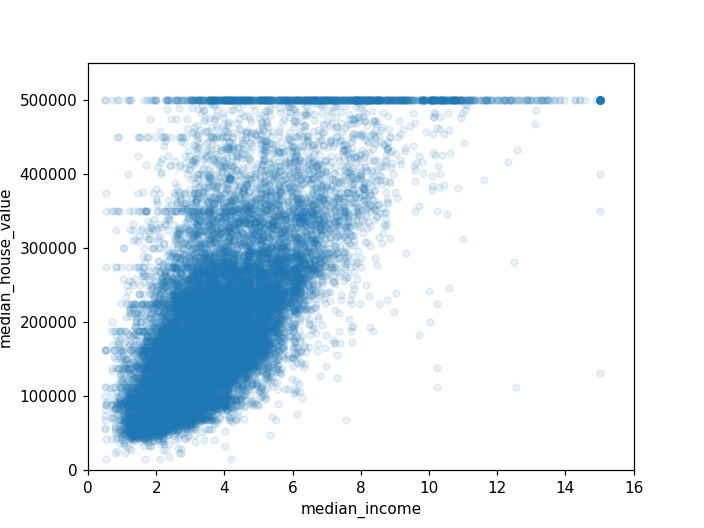

(0.0, 16.0, 0.0, 550000.0)

In [0]:
data_table.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])


One last thig you might want to think of while preparing your data is to try to combine some features together. For example the total number of rooms in a district is not very usefull if your don't know how many households there are. What you really want is the number of room per household. You also might want to look at bedrooms relative to the number of total rooms. We hence create a couple of new features:

In [0]:
data_table["rooms_per_household"] = data_table["total_rooms"]/data_table["households"]
data_table["bedrooms_per_room"] = data_table["total_bedrooms"]/data_table["total_rooms"]
data_table["population_per_household"]=data_table["population"]/data_table["households"]

In [0]:
corr_matrix = data_table.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

This is type of analysis is not exhaustive. It is just an illustrative example on how to think about your data.

### Prepare the Data for Machine Learning

Let's start by cleaning the data. We have seen earlier that total_bedrooms feature has soem missing value. We have three options to deal with that:

### Missing Data:

- Get rid of the corresponding districts
- Get rid of the whole feature
- Set the values to some value(mean, median, zero..etc)


For each option pandas offers a function: 

In [0]:
sample_incomplete_rows = data_table[data_table.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


In [0]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


In [0]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727


In [0]:
median = data_table["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [0]:
data_table["total_bedrooms"].fillna(median, inplace=True)
data_table["bedrooms_per_room"].fillna(median, inplace=True)

In [0]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_household         20640 non-null float64
bedrooms_per_room           20640 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


We opt for the third method. 

### Categorical Features:

In [0]:
housing_cat = data_table[["ocean_proximity"]]


In [0]:
housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


Most Machine learning algorithims work only with number. Hence we need to transform those categories to numbers:

We this we will use the SKlearn calss called OrdinalEncoder.

In [0]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded = pd.DataFrame(housing_cat_encoded)
housing_cat_encoded.columns = ['Category']

What is the problem with this encoding?

In [0]:
housing_cat_encoded

,Category
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
20635,1.0
20636,1.0
20637,1.0
20638,1.0


One issue with this encoding as we have discussed in previous class was the fact that some ML algorithims might assume that two nearby values are more similar that two distant. 

In [0]:
data_table.shape

(20640, 13)

In [0]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [0]:
columns =cat_encoder.categories_[0].tolist()
columns

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [0]:
data  = housing_cat_1hot.toarray()


In [0]:
n_frame = pd.DataFrame(data)


In [0]:
n_frame.columns=columns

In [0]:
n_frame

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [0]:
n_data_table = pd.concat([data_table,n_frame],axis=1,sort=False)

In [0]:
n_data_table

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


In [0]:
n_data_table = n_data_table.drop('ocean_proximity',axis=1)

In [0]:
n_data_table.shape

(20640, 17)

In [0]:
n_data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
bedrooms_per_room           20640 non-null float64
population_per_household    20640 non-null float64
<1H OCEAN                   20640 non-null float64
INLAND                      20640 non-null float64
ISLAND                      20640 non-null float64
NEAR BAY                    20640 non-null float64
NEAR OCEAN                  20640 non-null float64
dtypes: float64(17)
memo

### Split the Data

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


y = n_data_table['median_house_value']
X = n_data_table.drop('median_house_value',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Apply Regression 

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Lasso
from sklearn.preprocessing import PolynomialFeatures
linreg = LinearRegression().fit(X_train_scaled, y_train)

We first look at the outcome of an OLS linear regression:


In [0]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))

linear model coeff (w): [ -283017.76959062  -252972.02010306    57457.19363145  -269155.3378168
   383778.18446746 -1360217.26720725   611448.74380984   552305.2380892
   345402.00175413     6447.07058729    99998.29106641   -22485.09261889
   -61969.41853514   131612.65594079   -27770.68562666   -19387.45916008]
linear model intercept (b): 279126.429
R-squared score (training): 0.644
R-squared score (test): 0.653


The results don't look great for linear regression - Oddly the test score is higher than the training score which is usually a sign of underfitting.
Next we try to run a lasso regression.


In [0]:
linlasso = Lasso(alpha=20.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 249223.3811154845
lasso regression linear model coeff:
[ -263329.49505134  -234034.56927971    57361.43904874  -119993.09196064
   386986.01064878 -1216040.99678525   411952.76718075   547708.53910644
   168035.74538695     4470.5752804         0.                0.
   -42512.70733512    93328.63122743    -4115.46176323     3804.03414357]
Non-zero features: 14
R-squared score (training): 0.643
R-squared score (test): 0.652

Features with non-zero weight (sorted by absolute magnitude):
	population, -1216040.997
	median_income, 547708.539
	households, 411952.767
	total_bedrooms, 386986.011
	longitude, -263329.495
	latitude, -234034.569
	rooms_per_household, 168035.745
	total_rooms, -119993.092
	ISLAND, 93328.631
	housing_median_age, 57361.439
	INLAND, -42512.707
	bedrooms_per_room, 4470.575
	NEAR BAY, -4115.462
	NEAR OCEAN, 3804.034


In [0]:

from sklearn.model_selection import cross_val_score



cv_scores = cross_val_score(linlasso, X, y,cv=5)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.50003449 0.51199152 0.60193156 0.49273345 0.69755232]
Mean cross-validation score (3-fold): 0.561


In [0]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 15, r-squared training: 0.64, r-squared test: 0.65

Alpha = 1.00
Features kept: 15, r-squared training: 0.64, r-squared test: 0.65

Alpha = 2.00
Features kept: 15, r-squared training: 0.64, r-squared test: 0.65

Alpha = 3.00
Features kept: 15, r-squared training: 0.64, r-squared test: 0.65

Alpha = 5.00
Features kept: 15, r-squared training: 0.64, r-squared test: 0.65

Alpha = 10.00
Features kept: 14, r-squared training: 0.64, r-squared test: 0.65

Alpha = 20.00
Features kept: 14, r-squared training: 0.64, r-squared test: 0.65

Alpha = 50.00
Features kept: 12, r-squared training: 0.64, r-squared test: 0.65



In [0]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0, 50, 10)
train_scores, test_scores = validation_curve(Lasso( max_iter = 10000), X, y,
                                            param_name='alpha',
                                            param_range=param_range, cv=3)

/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ramzisaouma/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [0]:
housing_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [0]:
housing_predictions = tree_reg.predict(X_test_scaled)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

69544.16682551902

In [0]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [0]:
y_classes = y.copy()
y_classes[y_classes <= 100000] = 1
y_classes[y_classes <= 200000] = 2
y_classes[y_classes <= 300000] = 3
y_classes[y_classes <= 400000] = 4
y_classes[y_classes <= 500000] = 5


In [0]:
y_classes

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
20635    5.0
20636    5.0
20637    5.0
20638    5.0
20639    5.0
Name: median_house_value, Length: 20640, dtype: float64